***
## Ames housing prices



### *Import libs*

In [75]:
# Basic libs for working with data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
import scipy as sci
import plotly.express as px

import warnings 

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', 
              palette='coolwarm', 
              rc={'figure.figsize' :(15,10)})



***

## Dataset Loading

### *Load data from local*

- *Using these script to load data from your local*

- *File downloaded requires (if not)*

In [76]:
local_train_set_path = 'home-data-for-ml-course/train.csv'
local_test_set_path = 'home-data-for-ml-course/test.csv'

train_df = pd.read_csv(local_train_set_path, index_col='Id')
test_df = pd.read_csv(local_test_set_path, index_col='Id')



### *Fetch data from Github*



In [77]:
# url_train_path = 'https://raw.githubusercontent.com/lovecrushfamily/Alzheimer_Disease/refs/heads/main/alzheimers_disease_data.csv'
# url_test_path = 'https://raw.githubusercontent.com/lovecrushfamily/Alzheimer_Disease/refs/heads/main/alzheimers_disease_data.csv'

# train_df = pd.read_csv(url_train_path)
# test_df = pd.read_csv(url_test_path)

# train_df

***

## Dataset Overview

### *No. Features, Samples*

**Train set:**

- *1460 rows × 80 columns*

**Test set:**

- *1459 rows × 79 columns*

In [78]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [79]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

***

## Feature filtering

### *Categorical and Numerical variables*

In [81]:
def filter_cat_cols(df:pd.DataFrame, drop_cols:str=None):
    """"""
    if drop_cols==None:
        return df.select_dtypes(include=['object']).columns
    
    else:
        return df.select_dtypes(include=['object']).drop(columns={drop_cols}).columns

def filter_num_cols(df:pd.DataFrame, drop_cols:str=None):
    """"""
    if drop_cols==None:
        return df.select_dtypes(exclude=['object']).columns
    
    else:
        return df.select_dtypes(exclude=['object']).drop(columns={drop_cols}).columns



In [82]:
cat_cols = filter_cat_cols(train_df)
num_cols = filter_num_cols(train_df,drop_cols='SalePrice')
tar_col = "SalePrice"

***

## Exploratory Data Analysis

### *Missing values*

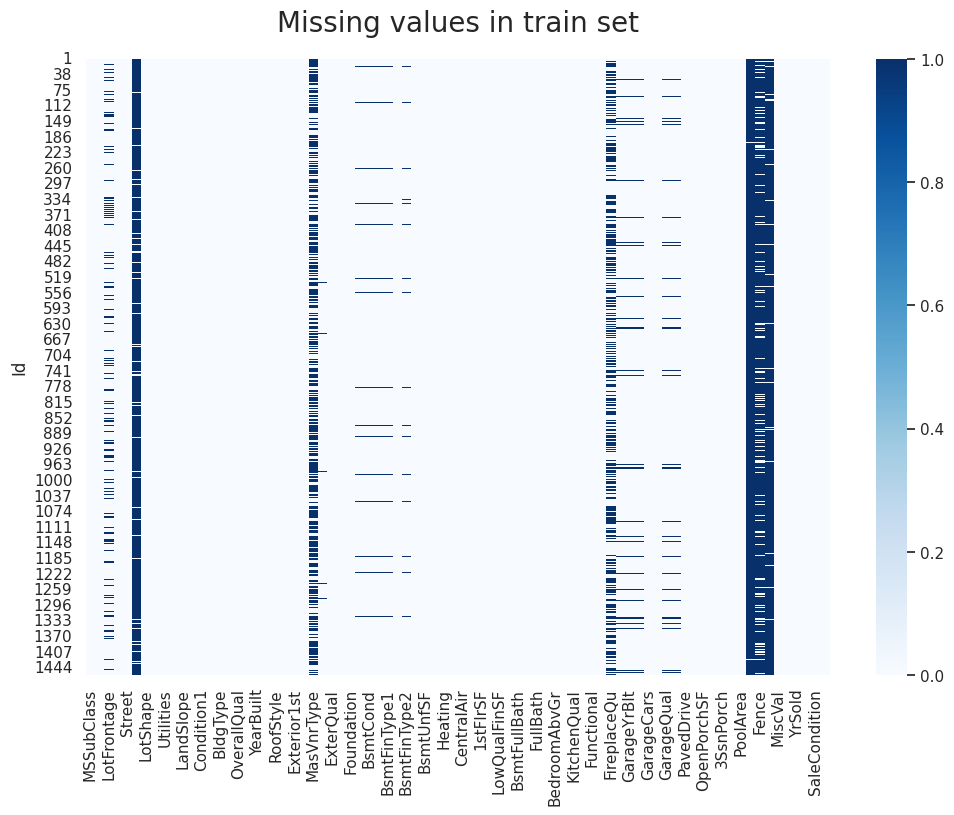

In [83]:
plt.subplots(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cmap='Blues')

plt.title("Missing values in train set", fontsize=20, pad=20)
plt.show()

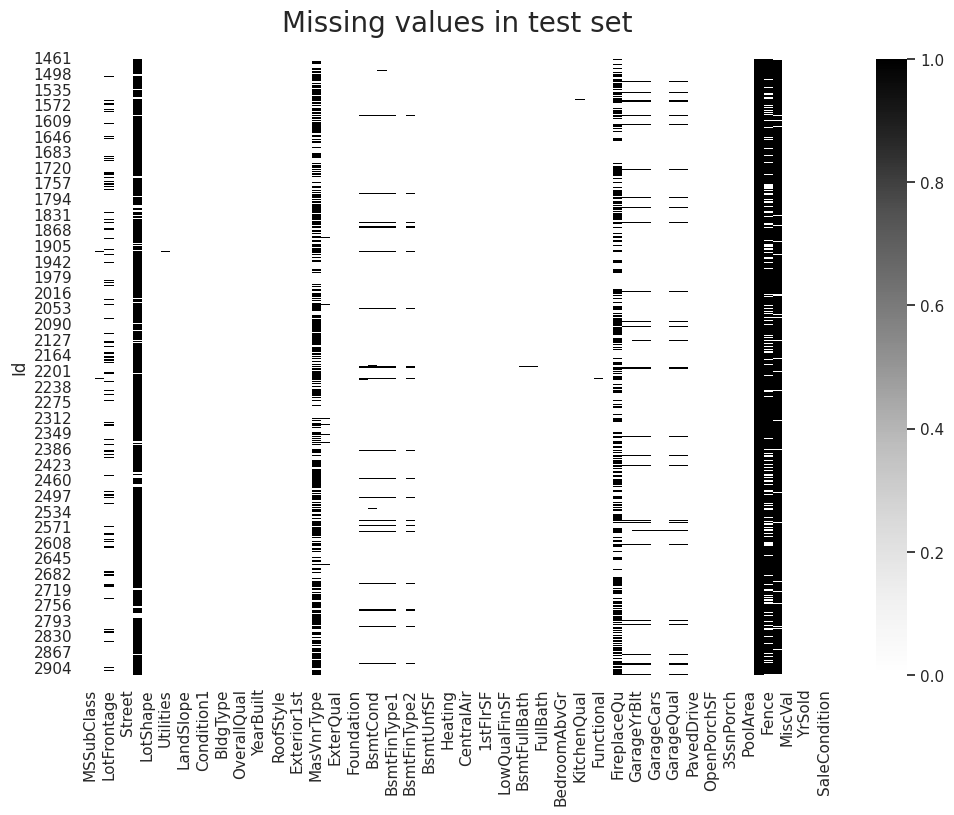

In [84]:
plt.subplots(figsize=(12, 8))
sns.heatmap(test_df.isnull(), cmap='Greys')

plt.title("Missing values in test set", fontsize=20, pad=20)
plt.show()

In [85]:
def report_missing_values(train_set:pd.DataFrame, test_set:pd.DataFrame=None):
    """"""
    miss_train_count = train_set.isnull().sum()
    miss_train_ratio = train_set.isnull().sum() / len(train_set) * 100

    cols_name = ['No. train set', "Ratio"]

    missing_report = pd.DataFrame([miss_train_count,miss_train_ratio.round(3),]).T
    missing_report.columns = cols_name

    
    if test_set is not None:
        missing_report["<> No. test set"] = test_set.isnull().sum()
        missing_report["test_ratio"] = round(test_df.isnull().sum()/len(test_df) * 100, 2)

    missing_report.sort_values("No. train set", inplace=True, ascending=False)

    return missing_report


In [86]:
report_missing_values(train_set=train_df, test_set=test_df)


,No. train set,Ratio,<> No. test set,test_ratio
PoolQC,1453.0,99.521,1456.0,99.79
MiscFeature,1406.0,96.301,1408.0,96.50
Alley,1369.0,93.767,1352.0,92.67
Fence,1179.0,80.753,1169.0,80.12
MasVnrType,872.0,59.726,894.0,61.27
FireplaceQu,690.0,47.260,730.0,50.03
LotFrontage,259.0,17.740,227.0,15.56
GarageYrBlt,81.0,5.548,78.0,5.35
GarageCond,81.0,5.548,78.0,5.35
GarageType,81.0,5.548,76.0,5.21


### *Duplicated records*


In [87]:
def filter_duplicated_records(train_set:pd.DataFrame):

    dup_ratio = train_set.duplicated().value_counts(normalize=True).to_frame()
    dup_count = train_set.duplicated().value_counts().to_frame()

    return pd.concat([dup_ratio, dup_count], axis=1)


filter_duplicated_records(train_df)


,proportion,count
False,1.0,1460


**False:** *indicate the number of unique records in dataset*

**True** *indicate the number of duplicated records in dataset*

### *Numerical Data*

In [88]:
def numerical_vars(df:pd.DataFrame, discrete_limit:int=5):
    vars_type = []

    for col in num_cols:
        if len(df[col].value_counts().values) <= discrete_limit:
            vars_type.append("Discrete ")

        else:
            vars_type.append("Continuos")

    return vars_type
    

def mcv_freq(df:pd.DataFrame, mcv:pd.DataFrame) -> float:
    """The function take the dataframe `df` and the dataframe `mcv`
    Args:
        df : the original data
        mcv : the most common value in each columns"""
    mcv_freq_= []
    for idx, col in enumerate(df.columns):
        mcv_freq_.append((df[df[col]==mcv[idx]].shape[0] / df.shape[0]) )

    return mcv_freq_

                
def outlier_prop(df:pd.DataFrame, lower_f:pd.DataFrame, upper_f:pd.DataFrame):
    """The function take lower_fence and upper fence as the two indicator of outlier
    Outliers are values that fall outside of these fence, 
    smaller than lower_f and higher than upper_f"""
    outliers_prop_ = []

    for idx, col in enumerate(df.columns):
        no_outliers = df[(df[col] > upper_f[idx]) | (df[col] < lower_f[idx])].shape[0]
        outliers_prop_.append(no_outliers / df.shape[0] * 100)
        
    return outliers_prop_
 

In [89]:
num_stats = train_df[num_cols].describe().transpose()
num_stats['IQR'] = num_stats["75%"] -  num_stats["25%"]
num_stats['lower fence'] = num_stats["25%"] - (num_stats['IQR']  * 1.5)
num_stats['upper fence'] = num_stats["75%"] + (num_stats['IQR']  * 1.5)
num_stats['skewness'] = train_df[num_cols].skew()
num_stats['kurtosis'] = train_df[num_cols].kurtosis()
num_stats['mcv'] = train_df[num_cols].mode().T
num_stats['mcv freq'] = mcv_freq(train_df[num_cols], num_stats['mcv'])
num_stats['outliers prop'] = outlier_prop(train_df[num_cols], num_stats['lower fence'], num_stats['upper fence'])
num_stats['vars'] = numerical_vars(train_df[num_cols], discrete_limit=15)

num_stats.sort_values('vars').round(3)


,count,mean,std,min,25%,50%,75%,max,IQR,lower fence,upper fence,skewness,kurtosis,mcv,mcv freq,outliers prop,vars
TotalBsmtSF,1460.0,1057.429,438.705,0.0,795.75,991.5,1298.25,6110.0,502.50,42.000,2052.000,1.524,13.250,0.0,0.025,4.178,Continuos
GarageArea,1460.0,472.980,213.805,0.0,334.50,480.0,576.00,1418.0,241.50,-27.750,938.250,0.180,0.917,0.0,0.055,1.438,Continuos
WoodDeckSF,1460.0,94.245,125.339,0.0,0.00,0.0,168.00,857.0,168.00,-252.000,420.000,1.541,2.993,0.0,0.521,2.192,Continuos
OpenPorchSF,1460.0,46.660,66.256,0.0,0.00,25.0,68.00,547.0,68.00,-102.000,170.000,2.364,8.490,0.0,0.449,5.274,Continuos
EnclosedPorch,1460.0,21.954,61.119,0.0,0.00,0.0,0.00,552.0,0.00,0.000,0.000,3.090,10.431,0.0,0.858,14.247,Continuos
3SsnPorch,1460.0,3.410,29.317,0.0,0.00,0.0,0.00,508.0,0.00,0.000,0.000,10.304,123.662,0.0,0.984,1.644,Continuos
ScreenPorch,1460.0,15.061,55.757,0.0,0.00,0.0,0.00,480.0,0.00,0.000,0.000,4.122,18.439,0.0,0.921,7.945,Continuos
GrLivArea,1460.0,1515.464,525.480,334.0,1129.50,1464.0,1776.75,5642.0,647.25,158.625,2747.625,1.367,4.895,864.0,0.015,2.123,Continuos
LowQualFinSF,1460.0,5.845,48.623,0.0,0.00,0.0,0.00,572.0,0.00,0.000,0.000,9.011,83.235,0.0,0.982,1.781,Continuos
2ndFlrSF,1460.0,346.992,436.528,0.0,0.00,0.0,728.00,2065.0,728.00,-1092.000,1820.000,0.813,-0.553,0.0,0.568,0.137,Continuos


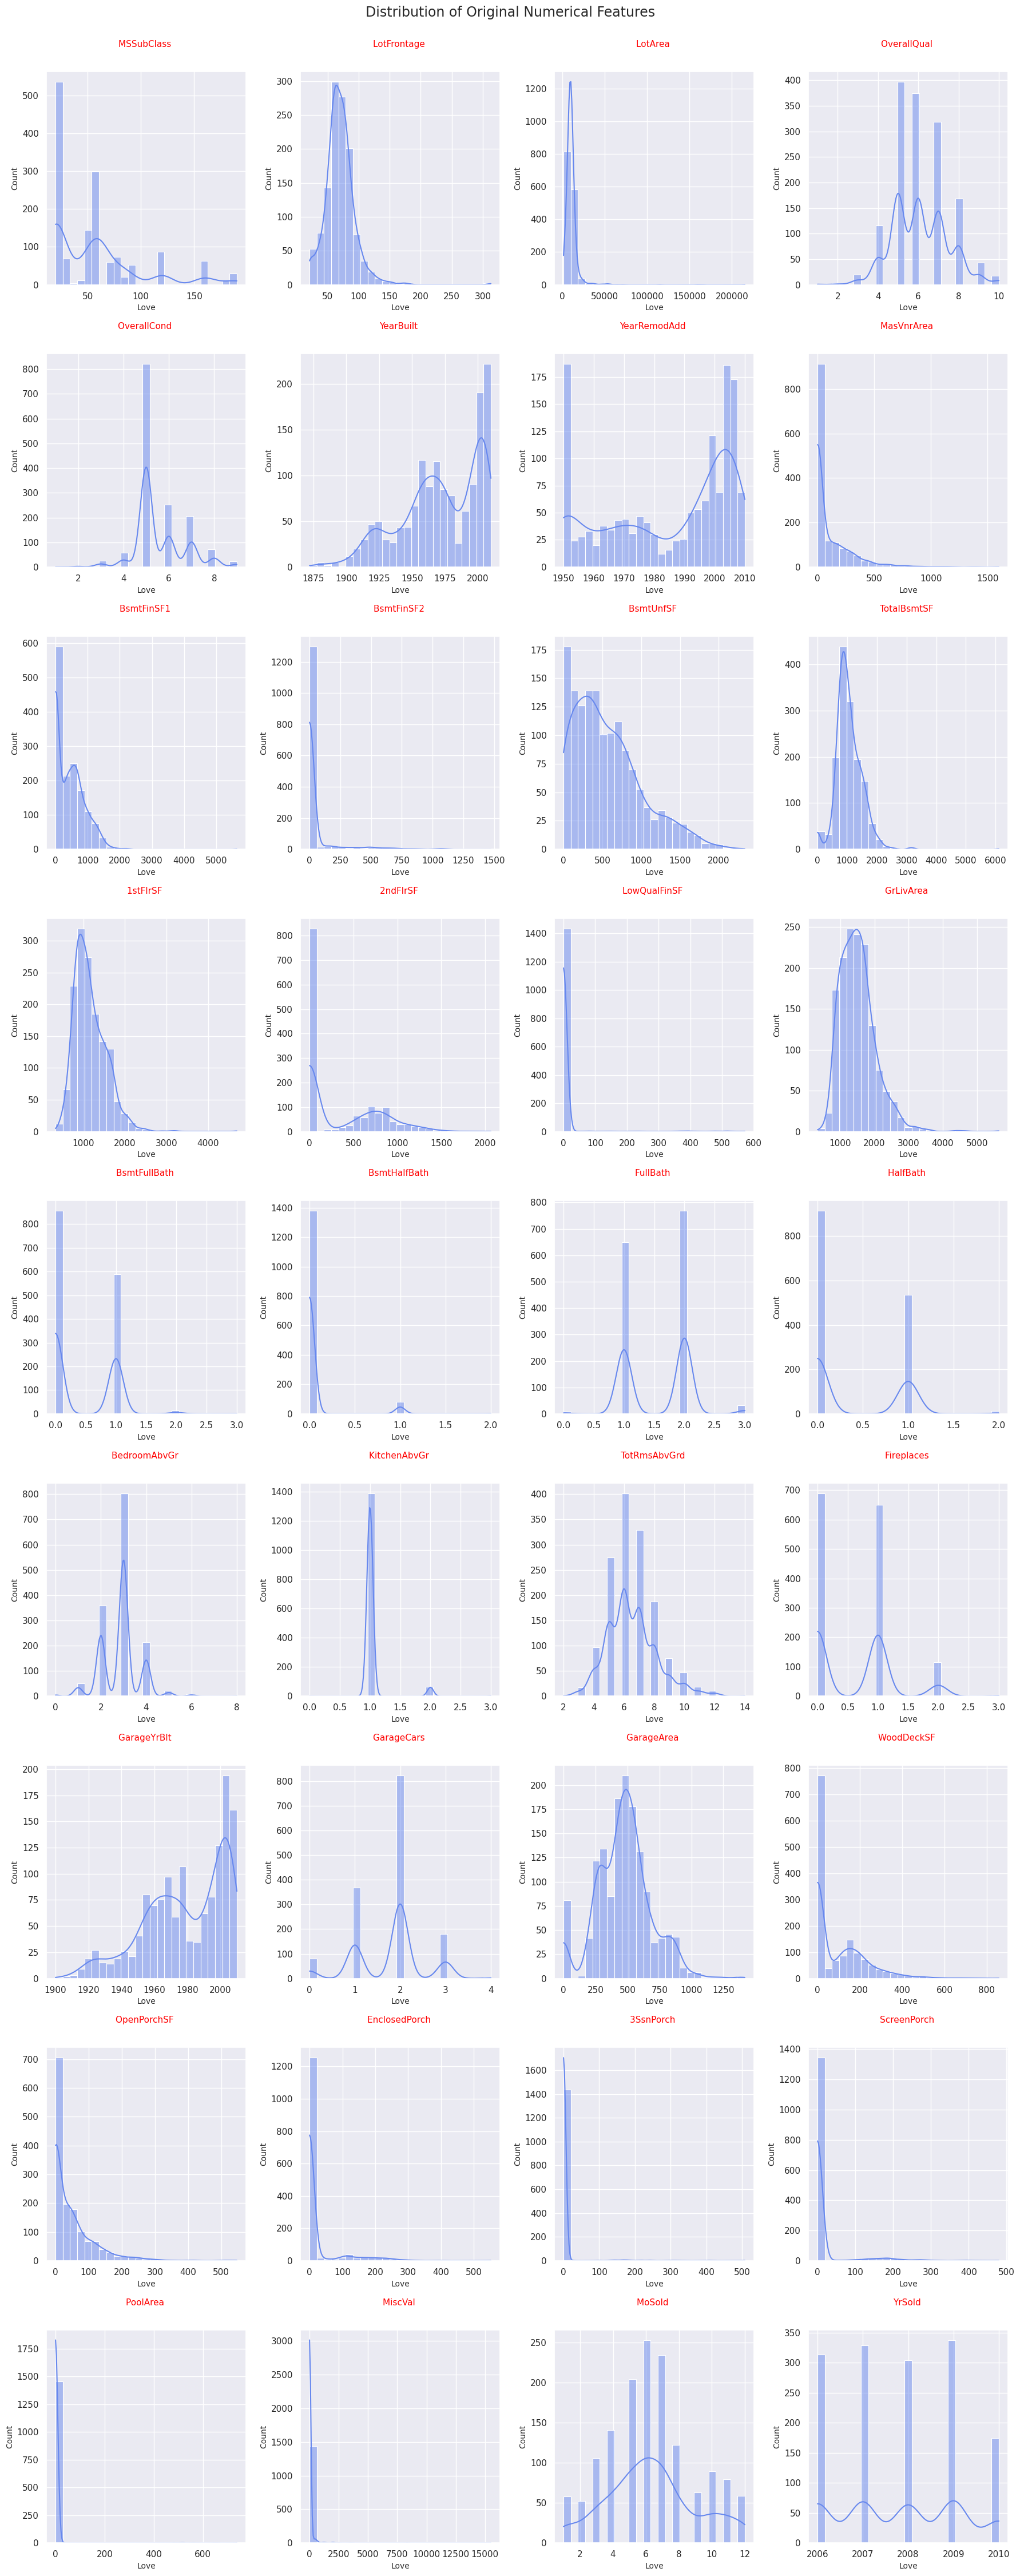

In [90]:

n_cols = 4   
n_rows = (len(num_cols) + n_cols - 1) // n_cols                     

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

axes = axes.ravel()

fig.suptitle("Distribution of Original Numerical Features", y=1, fontsize=17)

for i, column in enumerate(num_stats.index):

    ax = axes[i]
    ax.set_ylabel("", fontsize=10)
    ax.set_xlabel("Love", fontsize=10)
    ax.set_title(f'{column} \n\n',
                fontsize=11, 
                color='red')
    
    sns.histplot(train_df[column], kde=True, bins=25, ax=ax)


# Remove empty subplots if necessary
if len(num_cols) < n_cols * n_rows:
    for i in range(len(num_cols), n_cols * n_rows):
        fig.delaxes(axes[i])


plt.tight_layout()
plt.show()



### *Categorical data*

In [91]:
# def calculate_hist_bins(data: pd.Series) -> int:
#     """Freedman-Diaconis rule"""
#     interquartle = data.quantile(0.75,interpolation='midpoint') - data.quantile(0.25, interpolation='midpoint')
#     n = len(data)
#     bin_width = 2 * interquartle * (n ** (-1/3))
#     n_bins = (data.max() - data.min()) / bin_width
#     return interquartle

# train_df[cat_cols]

In [92]:
cat_stats = train_df[cat_cols].describe(include='object').T
cat_stats['null vals'] = train_df.shape[0] - cat_stats['count']
cat_stats['null prop'] = cat_stats['null vals'] / train_df.shape[0] * 100
cat_stats['freq prop'] = cat_stats['freq'] / train_df.shape[0] * 100

cat_stats.sort_values('freq prop', inplace=True, ascending=False)

cat_stats.style.background_gradient(cmap="coolwarm")

,count,unique,top,freq,null vals,null prop,freq prop
Utilities,1460,2,AllPub,1459,0,0.000000,99.931507
Street,1460,2,Pave,1454,0,0.000000,99.589041
Condition2,1460,8,Norm,1445,0,0.000000,98.972603
RoofMatl,1460,8,CompShg,1434,0,0.000000,98.219178
Heating,1460,6,GasA,1428,0,0.000000,97.808219
LandSlope,1460,3,Gtl,1382,0,0.000000,94.657534
CentralAir,1460,2,Y,1365,0,0.000000,93.493151
Functional,1460,7,Typ,1360,0,0.000000,93.150685
PavedDrive,1460,3,Y,1340,0,0.000000,91.780822
Electrical,1459,5,SBrkr,1334,1,0.068493,91.369863


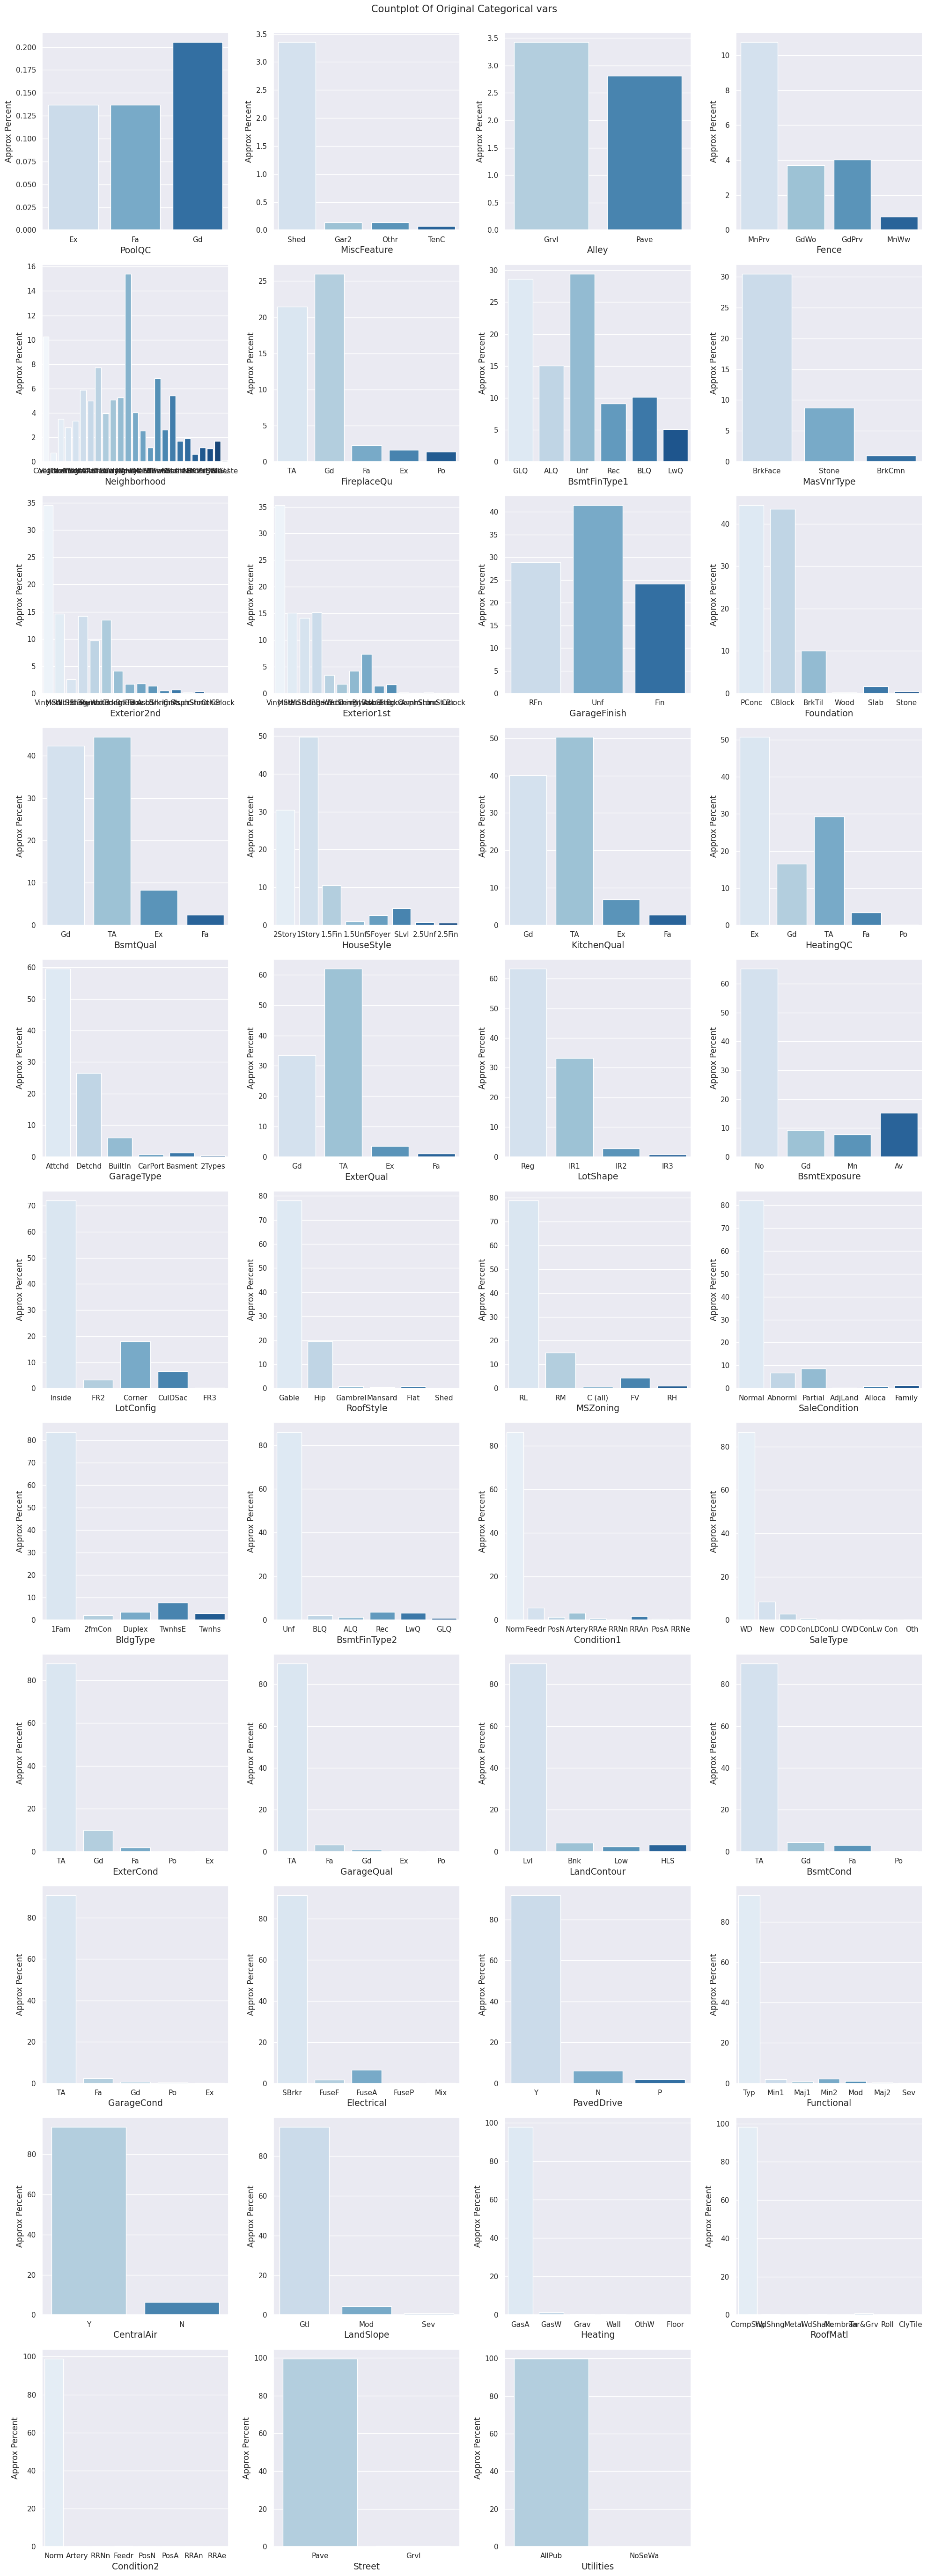

In [93]:
n_cols = 4
num_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(num_rows, n_cols, figsize=(20, 5 * num_rows))

axes = axes.ravel()

fig.suptitle("Countplot Of Original Categorical vars", y=1, fontsize=15)

for i, column in enumerate(cat_stats.sort_values('freq prop').index):

    ax = axes[i]
    ax.set_xlabel(column, fontsize=13.5)
    ax.set_ylabel('Approx Percent', fontsize=12.5)

    sns.countplot(data=train_df, 
                  x=column, ax=ax, 
                  palette='Blues', 
                  stat='percent')

# Remove empty subplots if necessary
if len(cat_cols) < n_cols * num_rows:
    for i in range(len(cat_cols), n_cols * num_rows):
        fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


### *Target feature*

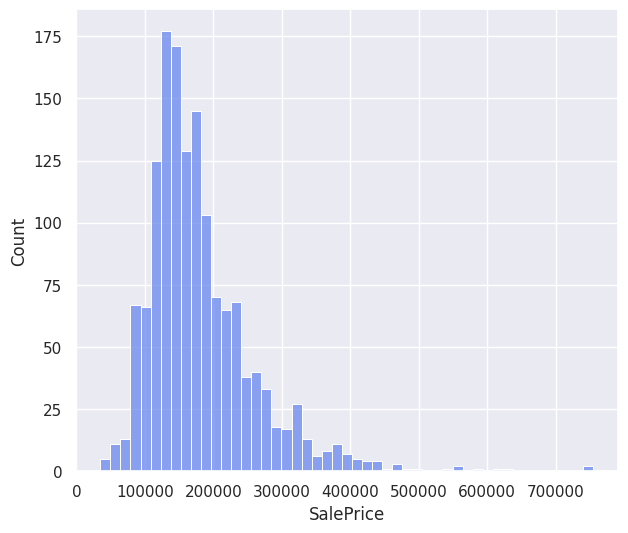

In [94]:
plt.figure(figsize=(7, 6))

sns.histplot(data=train_df,
                  x=tar_col, 
                  palette='Blues', 
                  )
plt.show()



## Preparing data

- *Handle duplicated records*

- *Categorical encoder*

- *Determine features*

### *Categorical encoded*

- *In this step you just have to specify the ordinal_vars or nominal vars for good, that's all*

- *Then encode them with simple technique, digitalize by number, don't care about the order of values at this time*

- *The process of determining which one is ordinal or Nominal can be automated or manually selected by human (prefer this )*

In [95]:
# def categorical_digitalize(df:pd.DataFrame):

#     for col in df.columns:
#         repl_dict = { val:idx for idx, val in enumerate(df[col].value_counts().index)}
#         df.replace(repl_dict, inplace=True)

#     return df                

# train_df_encoded = train_df.copy()
# train_df_encoded[cat_cols] = categorical_digitalize(train_df_encoded[cat_cols]).values
# train_df_encoded


# test_df_encoded = test_df.copy()
# test_df_encoded[cat_cols] = categorical_digitalize(test_df_encoded[cat_cols]).values
# test_df_encoded


### *Merge features*

- *categorical nominal vars and numerical discrete vars will be applied same preprocessing pipeline so we combine it into numerical features*

In [104]:
# Auto determine bases on the uniqueness of item limit.
cat_nominal_features = cat_stats[cat_stats['unique'] < 4].index
cat_ordinal_features = cat_stats[~cat_stats.index.isin(cat_nominal_vars)].index

numerical_features = num_cols
target_class = tar_col
target_class

'SalePrice'

***

## Preprocessing

In [98]:
from sklearn import set_config

set_config(display='diagram')
set_config(transform_output='pandas')

### *Split train, test set*

In [113]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns={tar_col})
y = train_df[[tar_col]]

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    )

X_train


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal


In [114]:
X_train.reset_index(drop='ID', inplace=True)
X_val.reset_index(drop='ID', inplace=True)

y_train.reset_index(drop='Id', inplace=True)
y_val.reset_index(drop='Id', inplace=True)

X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
3,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
4,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1164,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1165,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1166,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,912,912,GasA,Gd,Y,SBrkr,912,514,0,1426,0,0,1,1,3,1,Gd,7,Typ,1,Gd,Detchd,1925.0,Unf,1,216,TA,TA,Y,0,240,0,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [115]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler, MinMaxScaler

numerical_transformer = Pipeline(steps=[
    ("simple_impute", SimpleImputer(strategy='median')),
    ("rescale", StandardScaler()),
    ("min_max_scalar", MinMaxScaler(feature_range=(0,1)))
])

categorical_nominal_transformer = Pipeline(steps=[
    ("simple_impute", SimpleImputer(strategy='most_frequent')),
    ("one_hot_encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

categorical_ordinal_transformer = Pipeline(steps=[
    ("simple_imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder(handle_unknown='error')),
    ("min_max_scaler", MinMaxScaler(feature_range=(0,1)))
])



standard_preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer,   numerical_features),
    ("cat_nominal", categorical_nominal_transformer, cat_nominal_features) ,
    ("cat_ordinal", categorical_ordinal_transformer, cat_ordinal_features)
], verbose=True)

standard_preprocessor

# Data wrangling, feature engineering, manually

# ordinal => ordinal encoder =>  minmax_scalar
# nominal (2,3) => onehot encoder
# nominal_dominant(4,5,6 value) => reduce 2 values => onehot
# nominal(5,6,7,8) => reduce 2,3 => onhot 
# discrete(2,3) => onehot encoder
# discrete_interval,ratio(3, 4,) -> minmax scalar
# discrete (5,6,7,8 unique vals) => minmax rescaling
# continuous(normal distributed) => standard scalar
# continuous(outlier) => robust scalar



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simple_impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('rescale', StandardScaler()),
                                                 ('min_max_scalar',
                                                  MinMaxScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2nd...
       'LandContour', 'GarageQual', 'ExterCond', 'SaleType', 'Condition1', 'BsmtFinType2',
       'BldgType', 'SaleCondition', 'MSZoning', 'RoofStyle', 'LotConfig', 'BsmtExposure',
       'LotShape', 'ExterQual', 'GarageType', 'HeatingQC', 'KitchenQual', 'HouseStyle', 'BsmtQual',
       'Foundation', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'FireplaceQu', 'Neighborhood',
       'Fence', 'MiscFeature'],
      dtype='object'))],
                  verbose=True)

In [116]:
X_train_trans = standard_preprocessor.fit_transform(X_train)
X_train_trans

[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer] ... (2 of 3) Processing cat_nominal, total=   0.0s
[ColumnTransformer] ... (3 of 3) Processing cat_ordinal, total=   0.0s


,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageYrBlt,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__MoSold,num__YrSold,cat_nominal__Utilities_AllPub,cat_nominal__Utilities_NoSeWa,cat_nominal__Street_Grvl,cat_nominal__Street_Pave,cat_nominal__LandSlope_Gtl,cat_nominal__LandSlope_Mod,cat_nominal__LandSlope_Sev,cat_nominal__CentralAir_N,cat_nominal__CentralAir_Y,cat_nominal__PavedDrive_N,cat_nominal__PavedDrive_P,cat_nominal__PavedDrive_Y,cat_nominal__GarageFinish_Fin,cat_nominal__GarageFinish_RFn,cat_nominal__GarageFinish_Unf,cat_nominal__MasVnrType_BrkCmn,cat_nominal__MasVnrType_BrkFace,cat_nominal__MasVnrType_Stone,cat_nominal__Alley_Grvl,cat_nominal__Alley_Pave,cat_nominal__PoolQC_Ex,cat_nominal__PoolQC_Fa,cat_nominal__PoolQC_Gd,cat_ordinal__Condition2,cat_ordinal__RoofMatl,cat_ordinal__Heating,cat_ordinal__Functional,cat_ordinal__Electrical,cat_ordinal__GarageCond,cat_ordinal__BsmtCond,cat_ordinal__LandContour,cat_ordinal__GarageQual,cat_ordinal__ExterCond,cat_ordinal__SaleType,cat_ordinal__Condition1,cat_ordinal__BsmtFinType2,cat_ordinal__BldgType,cat_ordinal__SaleCondition,cat_ordinal__MSZoning,cat_ordinal__RoofStyle,cat_ordinal__LotConfig,cat_ordinal__BsmtExposure,cat_ordinal__LotShape,cat_ordinal__ExterQual,cat_ordinal__GarageType,cat_ordinal__HeatingQC,cat_ordinal__KitchenQual,cat_ordinal__HouseStyle,cat_ordinal__BsmtQual,cat_ordinal__Foundation,cat_ordinal__Exterior1st,cat_ordinal__Exterior2nd,cat_ordinal__BsmtFinType1,cat_ordinal__FireplaceQu,cat_ordinal__Neighborhood,cat_ordinal__Fence,cat_ordinal__MiscFeature
0,0.000000,0.167808,0.033186,0.444444,0.625,0.615942,0.116667,0.000000,0.163359,0.0,0.167808,0.215057,0.224874,0.000000,0.0,0.184627,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.250000,0.000000,0.518182,0.25,0.207334,0.291715,0.000000,0.000000,0.0,0.0,0.0,0.0,0.454545,1.00,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.285714,0.166667,0.2,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.250,1.0,0.0,0.8,0.75,0.2,1.0,1.0,1.0,1.000000,0.2,1.0,1.000000,0.285714,1.000000,0.2,0.571429,0.533333,0.8,0.5,0.500000,0.666667,0.666667
1,0.235294,0.130137,0.030555,0.555556,0.750,0.876812,0.733333,0.000000,0.000000,0.0,0.342038,0.130769,0.106700,0.373850,0.0,0.233044,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.845455,0.50,0.267983,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.0,0.363636,0.75,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.285714,0.166667,0.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.250,1.0,0.0,0.8,0.75,0.2,1.0,1.0,0.0,0.666667,0.2,0.5,1.000000,0.714286,0.666667,0.4,0.857143,0.866667,1.0,1.0,0.333333,0.666667,0.666667
2,0.058824,0.157534,0.034948,0.444444,0.750,0.275362,0.000000,0.000000,0.000000,0.0,0.340753,0.130278,0.106012,0.000000,0.0,0.087038,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.166667,0.000000,0.727273,0.00,0.000000,0.382730,0.000000,0.297101,0.0,0.0,0.0,0.0,0.363636,0.50,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.285714,0.166667,0.2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.125,1.0,0.0,0.8,0.75,0.2,1.0,1.0,1.0,1.000000,0.2,0.5,1.000000,0.285714,0.333333,0.2,0.571429,0.933333,1.0,0.5,0.291667,0.666667,0.666667
3,0.176471,0.133562,0.027577,0.444444,0.750,0.471014,0.000000,0.182874,0.100815,0.0,0.069349,0.119640,0.148463,0.381114,0.0,0.270158,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.416667,0.666667,0.354545,0.25,0.169252,0.000000,0.000000,0.478261,0.0,0.0,0.0,0.0,0.454545,0.25,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.

In [117]:
X_test_trans = standard_preprocessor.transform(X_val)
X_test_trans

ValueError: Found unknown categories ['Membran'] in column 1 during transform

In [120]:
X_val

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,TA,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal
1,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
2,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Gd,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
3,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
4,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,30,RM,50.0,5925,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,7,1937,2000,Hip,CompShg,Stucco,Stucco,BrkCmn,435.0,TA,TA,BrkTil,Fa,TA,No,Rec,168,Unf,0,739,907,GasA,TA,Y,SBrkr,1131,0,0,1131,0,0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1995.0,Unf,2,672,TA,TA,Y,0,72,0,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca
288,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274,Unf,0,256,1530,GasA,Ex,Y,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,430,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
289,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,WdShing,Wd Shng,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,648,Unf,0,80,728,GasA,Ex,Y,SBrkr,728,728,0,1456,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,410,TA,TA,Y,36,18,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
290,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,2Story,4,5,1940,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,Unf,0,Unf,0,755,755,GasA,TA,Y,SBrkr,755,755,0,1510,1,0,1,0,4,1,TA,7,Typ,1,Gd,Detchd,1940.0,Unf,1,296,Fa,Po,P,120,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2

In [ ]:
# standard_preprocessor

## Modeling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    model= LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    return mean_absolute_error(y_valid, predictions)


In [ ]:
score_dataset(X_train, X_valid, y_train, y_valid)

### Cross validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=500, random_state=0, verbose=True)

my_pipeline = Pipeline(steps=[
    ('Col_trans', standard_preprocessor),
    ('rf_model', rf_model)
])


scores = -1 * cross_validate(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error', verbose=True)

scores, scores.mean()



[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


TypeError: unsupported operand type(s) for *: 'int' and 'dict'